In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Generating the points

def changeCoor(theta: float, R=1):
    return np.array([R*np.cos(theta), R*np.sin(theta)])

def generatePoints(N):
    points = []

    thetas = [np.random.random() * np.pi * 1.5 for _ in range(N)]
    thetas.sort()
    points = [changeCoor(x) for x in thetas]
    
    return np.array(points)

N = 100
points = generatePoints(N)

<function matplotlib.pyplot.show(close=None, block=None)>

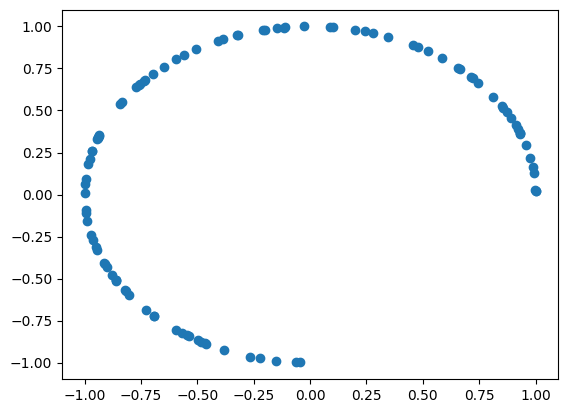

In [5]:
# print(points)

plt.scatter(points[:, 0], points[:, 1])
plt.show

In [6]:
def euclidean_dis(X, Y):
    return np.linalg.norm(X - Y)

def gaussian_kernal(X, Y):
    distance = euclidean_dis(X, Y)
    result = np.exp(-distance**2 / Sigma)
    return result

def get_k(points):
    K = []
    for i in range(N):
        row = [gaussian_kernal(points[i], points[j]) for j in range(N)]
        K.append(np.array(row))
            
    return np.array(K)

def normalize_row(K):
    normalize = lambda row, sum: np.array(list(map(lambda x: x/sum, row)))
        
    P = [normalize(row, sum(row)) for row in K]
    return np.array(P)


Sigma = np.pi * 1.5 / N
K = get_k(points)
P = normalize_row(K)

In [7]:
# Show that P is markov matrix

v = np.array([1 for _ in range(N)])
print()
print(np.dot(P, v))

a = P
for _ in range(1000):
    a = np.dot(a, P)
    
print()
print(np.round(a, 1))

print()
print(np.dot(a, v))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [8]:
def compute_with_row(P, i, j):
    sum = 0
    for k in range(N):
        sum += (P[i][k] - P[j][k]) ** 2
    return sum
    
def get_D(P):
    Drow = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            Drow[i][j] = compute_with_row(P, i, j)
    return Drow

# diffusion distance matrix
D = get_D(P)
print(np.round(D, 1))

[[0.  0.  0.  ... 0.3 0.3 0.4]
 [0.  0.  0.  ... 0.3 0.3 0.4]
 [0.  0.  0.  ... 0.3 0.3 0.4]
 ...
 [0.3 0.3 0.3 ... 0.  0.  0. ]
 [0.3 0.3 0.3 ... 0.  0.  0. ]
 [0.4 0.4 0.4 ... 0.  0.  0. ]]


The line below is about the Probability Density Function.
And the graph show the "Diffusion Distance", like the "Difference" of two "function".

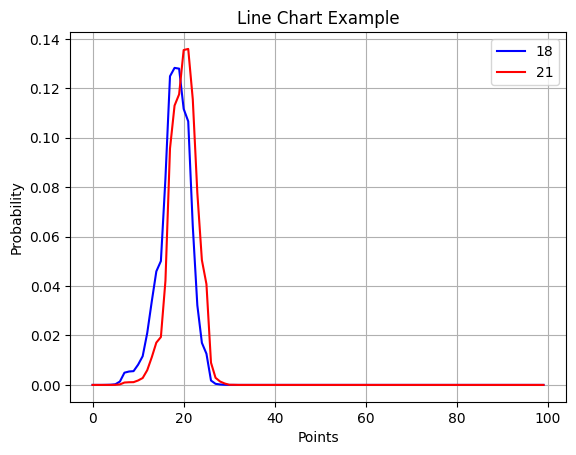

In [9]:
# show the row of the P matrix of two points

# indeces = [i for i in range(1)]
indeces = [18, 21]
y = [P[index] for index in indeces]
x = np.array([i for i in range(N)])
COLOR = ['blue', 'red', 'brown', 'black', 'green']
for i in range(len(indeces)):
    plt.plot(x, y[i], color=COLOR[i%5], label=f'{indeces[i]}')

plt.title('Line Chart Example')
plt.xlabel('Points')
plt.ylabel('Probability')

plt.legend()
plt.grid(True)
plt.show()